In [2]:
import math
import warnings

from pandas import ExcelWriter
from pandas import ExcelFile

import scipy.stats

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
#import statsmodels.formula.api as smf
import os

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [3]:
cwd = os.getcwd()
print(cwd)

os.chdir(r'''C:\Users\wscott\AppData\Local\Programs\Python''')
print(cwd)

C:\Users\wscott\AppData\Local\Programs\Python\Thinkful_Drills
C:\Users\wscott\AppData\Local\Programs\Python\Thinkful_Drills


In [4]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [5]:
df['Murder'] = df.iloc[:,3]
df.Murder.head()

0   0.000
1   0.000
2   0.000
3   8.000
4   0.000
Name: Murder, dtype: float64

In [6]:
df['Population'].describe()

count       348.000
mean      40037.632
std      450037.368
min         526.000
25%        3003.000
50%        7233.500
75%       18427.500
max     8396126.000
Name: Population, dtype: float64

In [7]:
df.Murder.describe()

count   348.000
mean      1.566
std      18.304
min       0.000
25%       0.000
50%       0.000
75%       0.000
max     335.000
Name: Murder, dtype: float64

In [8]:
df.Robbery.describe()

count     348.000
mean       72.902
std      1031.033
min         0.000
25%         0.000
50%         1.000
75%         5.000
max     19170.000
Name: Robbery, dtype: float64

In [10]:
robbery_mask = (df.Robbery>0)
df.Robbery[robbery_mask]

3      227.000
4        4.000
5        3.000
7       31.000
8        4.000
9       12.000
11       3.000
14      22.000
15       1.000
16       1.000
17       3.000
18      13.000
19       3.000
20       1.000
21       3.000
22     101.000
28       1.000
31      10.000
32       5.000
35    1322.000
40       9.000
42       1.000
43       1.000
49       1.000
51       2.000
53      48.000
56       2.000
57      17.000
58       3.000
59       3.000
        ...   
300      6.000
301     16.000
302      1.000
303      1.000
304      5.000
305     34.000
308      1.000
309      1.000
310    400.000
311      3.000
313      4.000
314     26.000
315    145.000
316      1.000
320      2.000
321    102.000
322      6.000
323      1.000
324     16.000
327      1.000
329      3.000
330     16.000
331     11.000
333      1.000
334      3.000
338      9.000
340     28.000
343      2.000
346    390.000
347      2.000
Name: Robbery, Length: 209, dtype: float64

In [11]:
murder_mask = (df.Murder>0)
robbery_mask = (df.Robbery>0)

In [12]:
df[murder_mask & robbery_mask]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan,8.000
7,Amherst Town,118296.000,107.000,1.000,nan,7.000,31.000,68.000,2118.000,204.000,1882.000,32.000,3.000,1.000
14,Auburn,27270.000,96.000,1.000,nan,20.000,22.000,53.000,859.000,132.000,721.000,6.000,nan,1.000
22,Binghamton,46304.000,284.000,3.000,nan,19.000,101.000,161.000,2349.000,525.000,1767.000,57.000,nan,3.000
31,Brighton Town,36689.000,26.000,1.000,nan,2.000,10.000,13.000,793.000,142.000,623.000,28.000,nan,1.000
32,Brockport Village,8284.000,23.000,1.000,nan,1.000,5.000,16.000,165.000,29.000,132.000,4.000,nan,1.000
35,Buffalo,258789.000,3249.000,47.000,nan,145.000,1322.000,1735.000,12491.000,3458.000,8076.000,957.000,nan,47.000
84,East Fishkill Town,29315.000,9.000,1.000,nan,0.000,1.000,7.000,165.000,18.000,141.000,6.000,nan,1.000
88,East Rochester Village,6596.000,8.000,1.000,nan,0.000,3.000,4.000,125.000,25.000,97.000,3.000,nan,1.000
115,Geneva,13194.000,28.000,1.000,nan,4.000,5.000,18.000,343.000,65.000,275.000,3.000,1.000,1.000


In [13]:
df['murder_cat'] = murder_mask
df['robbery_cat'] = robbery_mask

In [14]:
df['Pop_squared'] = np.multiply(df.Population, df.Population)

In [15]:
df['prop_crimes'] = df.iloc[:,8]

In [16]:
df.prop_crimes.describe()


count      348.000
mean       792.606
std       7659.725
min          0.000
25%         40.500
50%        112.500
75%        341.000
max     141971.000
Name: prop_crimes, dtype: float64

In [17]:
df[df.prop_crimes > 100000]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder,murder_cat,robbery_cat,Pop_squared,prop_crimes
216,New York,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,nan,335.000,True,True,70494931807876.000,141971.000


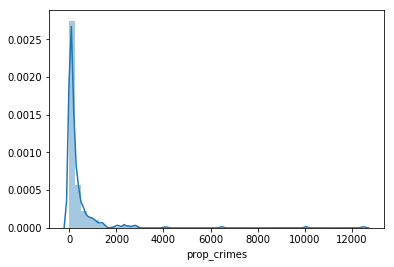

In [18]:
sns.distplot(df.prop_crimes.dropna().drop(216))

{'whiskers': [<matplotlib.lines.Line2D at 0x2c840b08630>,
 'caps': [<matplotlib.lines.Line2D at 0x2c840b08c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c840b084a8>],
 'medians': [<matplotlib.lines.Line2D at 0x2c840b15320>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c840b15668>],
 'means': []}

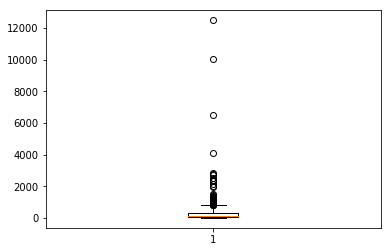

In [19]:
plt.boxplot(df.prop_crimes.dropna().drop(216))

In [20]:
df['prop_crimes_windsorize'] = scipy.stats.mstats.winsorize(df.prop_crimes, limits = 0.05)


{'whiskers': [<matplotlib.lines.Line2D at 0x2c840b6e5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c840b6ec50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c840b6e470>],
 'medians': [<matplotlib.lines.Line2D at 0x2c840b76320>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c840b76668>],
 'means': []}

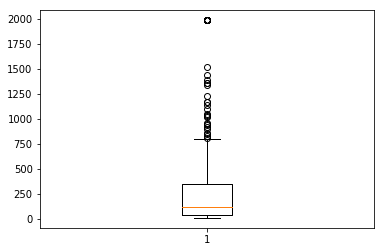

In [21]:
plt.boxplot(df.prop_crimes_windsorize)

In [60]:
df['sqrt_pop'] = [math.sqrt(x) for x in  df.Population]

In [41]:
#Propertycrime = [df['Population'],df['Pop_squared'],df['murder_cat'],df['robbery_cat']]
features_1 = df[['Population','Pop_squared','murder_cat','robbery_cat', 'prop_crimes_windsorize']].dropna()

In [42]:
regr = linear_model.LinearRegression()
Y = features_1['prop_crimes_windsorize'].values.reshape(-1, 1)
X = features_1[['Population','Pop_squared','murder_cat','robbery_cat']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.15413949e-02 -1.35180090e-09  2.26268064e+02  1.54264874e+02]]

Intercept: 
 [-4.85147049]

R-squared:
0.7346667944463335


Let's check out the residuals to see how we can improve the R-squared to explain more of the variance

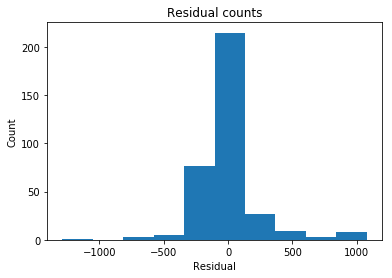

In [44]:
predicted = regr.predict(X).ravel()
actual = final_df['prop_crimes_windsorize']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

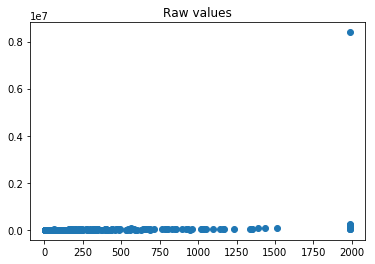

In [45]:
plt.scatter(actual, features_1.Population )
plt.title('Raw values')
plt.show()


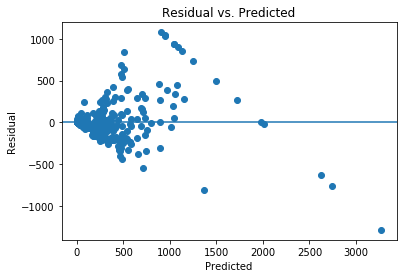

In [46]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [54]:
features_2 = df[['Population','Pop_squared','murder_cat','robbery_cat', 'prop_crimes']].dropna()


In [55]:
regr = linear_model.LinearRegression()
Y = features_2['prop_crimes'].values.reshape(-1, 1)
X = features_2[['Population','Pop_squared','murder_cat','robbery_cat']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]]

Intercept: 
 [-109.57533562]

R-squared:
0.9961247104988709


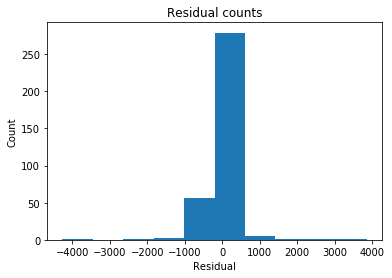

In [56]:
predicted = regr.predict(X).ravel()
actual = features_2['prop_crimes']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

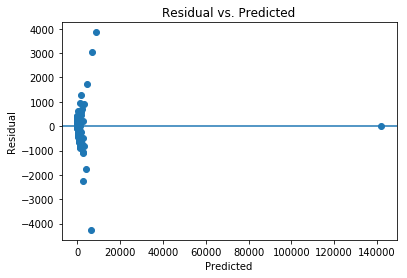

In [57]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()



In [58]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Pop_squared,murder_cat,robbery_cat
Population,1.000,0.998,0.162,0.064
Pop_squared,0.998,1.000,0.133,0.044
murder_cat,0.162,0.133,1.000,0.313
robbery_cat,0.064,0.044,0.313,1.000


In [61]:
features_3 = df[['sqrt_pop','murder_cat','robbery_cat', 'prop_crimes']].dropna()


In [64]:
regr = linear_model.LinearRegression()
Y = features_3['prop_crimes'].values.reshape(-1, 1)
X = features_3[['sqrt_pop','murder_cat','robbery_cat']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[   47.07052798 -2681.21405906 -2170.90981301]]

Intercept: 
 [-2833.0185191]

R-squared:
0.9215517134752761


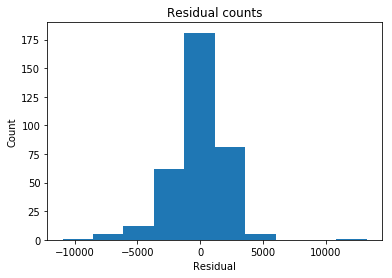

In [66]:
predicted = regr.predict(X).ravel()
actual = features_3['prop_crimes']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

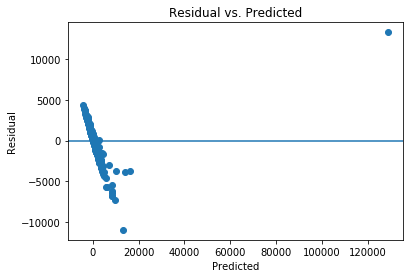

In [67]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()



In [78]:
features_4 = df[['Population','murder_cat','robbery_cat', 'prop_crimes']].dropna()


In [79]:
regr = linear_model.LinearRegression()
Y = features_4['prop_crimes'].values.reshape(-1, 1)
X = features_4[['Population','murder_cat','robbery_cat']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1.68728222e-02 6.07383740e+02 1.06994709e+02]]

Intercept: 
 [-32.72226824]

R-squared:
0.99344854357257


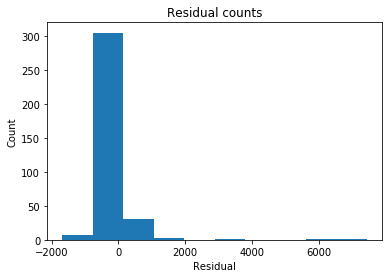

In [80]:
predicted = regr.predict(X).ravel()
actual = features_4['prop_crimes']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [81]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,murder_cat,robbery_cat
Population,1.000,0.162,0.064
murder_cat,0.162,1.000,0.313
robbery_cat,0.064,0.313,1.000


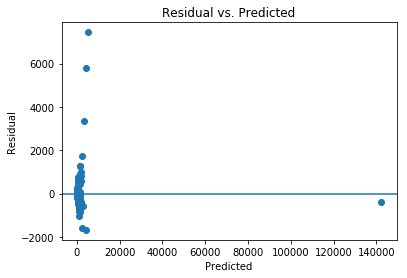

In [82]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [88]:
new = predicted < 0
new.count

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [90]:
np.sum(new)

42